In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('C:/Users/User/Downloads/teen_phone_addiction_dataset.csv')

# Выбираем столбец N%7, где N=13
# 13 % 7 = 6, но так как индексация обычно с 0, уточним
column_index = 13 % 7  # Результат: 6
time_on_education = df['Time_on_Education']
print(time_on_education)

data = [x for x in time_on_education.tolist() if pd.notna(x)]
n = len(data)
sorted_data = sorted(data)

0       1.2
1       1.8
2       0.4
3       0.8
4       1.1
       ... 
2995    1.0
2996    0.3
2997    2.4
2998    1.5
2999    0.1
Name: Time_on_Education, Length: 3000, dtype: float64


In [28]:

from collections import Counter

def mean(data):
    """Среднее арифметическое"""
    return sum(data) / len(data)

def variance(data):
    """Дисперсия"""
    n = len(data)
    if n < 2:
        return 0
    mean_val = mean(data)
    return sum((x - mean_val) ** 2 for x in data) / n  # несмещенная оценка

def mode(data):
    """Мода без использования Counter"""
    if not data:
        return []
    
    # Создаем словарь для подсчета частот
    freq_dict = {}
    for item in data:
        if item in freq_dict:
            freq_dict[item] += 1
        else:
            freq_dict[item] = 1
    
    # Находим максимальную частоту
    max_freq = max(freq_dict.values())
    
    # Находим все элементы с максимальной частотой
    modes = [item for item, freq in freq_dict.items() if freq == max_freq]
    
    return modes

def median(data):
    """Медиана"""
    sorted_data = sorted(data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

def quantile(data, p):
    """Квантиль уровня p (0 <= p <= 1)"""
    sorted_data = sorted(data)
    index = p * (n - 1)
    
    if index.is_integer():
        return sorted_data[int(index)]
    else:

        return sorted_data[int(index)] + (sorted_data[int(index)+1] - sorted_data[int(index)]) * (index - int(index))

def skewness(data):
    """Асимметрия"""
    if n < 3:
        return 0
    
    mean_val = mean(data)
    std_dev = math.sqrt(variance(data))
    
    if std_dev == 0:
        return 0
    
    cubed_deviations = sum((x - mean_val) ** 3 for x in data)
    return (cubed_deviations / n) / (std_dev ** 3)

def kurtosis(data):
    """Эксцесс"""
    if n < 4:
        return 0
    
    mean_val = mean(data)
    std_dev = math.sqrt(variance(data))
    
    if std_dev == 0:
        return 0
    
    fourth_deviations = sum((x - mean_val) ** 4 for x in data)
    return (fourth_deviations / n) / (std_dev ** 4) - 3  # эксцесс относительно нормального распределения

def iqr(data):
    """Интерквартильный размах"""
    return quantile(data, 0.75) - quantile(data, 0.25)

mean_val = mean(data)
print(f"Среднее {mean_val:.4f}")

variance_val = variance(data)
print(f"Дисперсия {variance_val:.4f}")

mode_val = mode(data)
print(f"Мода {mode_val}")

median_val = median(data)
print(f"Медиана {median_val:.4f}")

quantile_25_val = quantile(data, 0.25)
print(f"Квантиль 0,25 {quantile_25_val:.4f}")

quantile_50_val = quantile(data, 0.5)
print(f"Квантиль 0,5 {quantile_50_val:.4f}")

quantile_75_val = quantile(data, 0.75)
print(f"Квантиль 0,75 {quantile_75_val:.4f}")

kurtosis_val = kurtosis(data)
print(f"Эксцесс {kurtosis_val:.4f}")

skewness_val = skewness(data)
print(f"Ассиметрия {skewness_val:.4f}")

iqr_val = iqr(data)
print(f"Интервальный размах {iqr_val:.4f}")

Среднее 1.0163
Дисперсия 0.4202
Мода [0.0]
Медиана 1.0000
Квантиль 0,25 0.5000
Квантиль 0,5 1.0000
Квантиль 0,75 1.5000
Эксцесс -0.4000
Ассиметрия 0.3400
Интервальный размах 1.0000


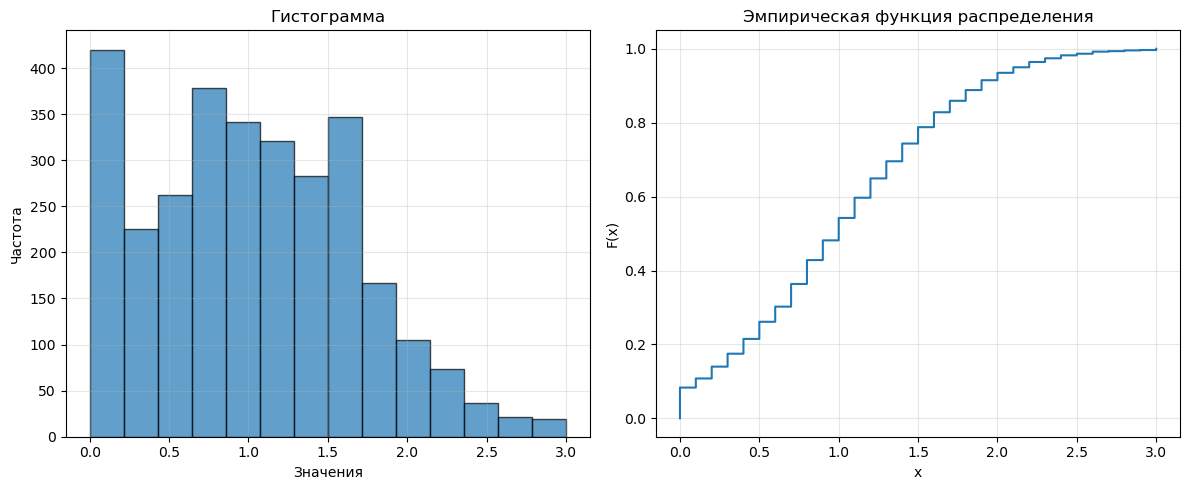

In [97]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(data, bins=14, edgecolor='black', alpha=0.7)
plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма')
plt.grid(True, alpha=0.3)

# ECDF
plt.subplot(1, 2, 2)
x_sorted = np.sort(data)
y_ecdf = np.arange(1, len(x_sorted) + 1) / len(x_sorted)
plt.step(x_sorted, y_ecdf, where='post')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Эмпирическая функция распределения')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Критерий хи-квадрат:
Статистика хи-квадрат: 221.42
Критическое значение (alpha=0.05, df=5): 11.07
Отвергаем гипотезу о нормальности (данные не нормальны)


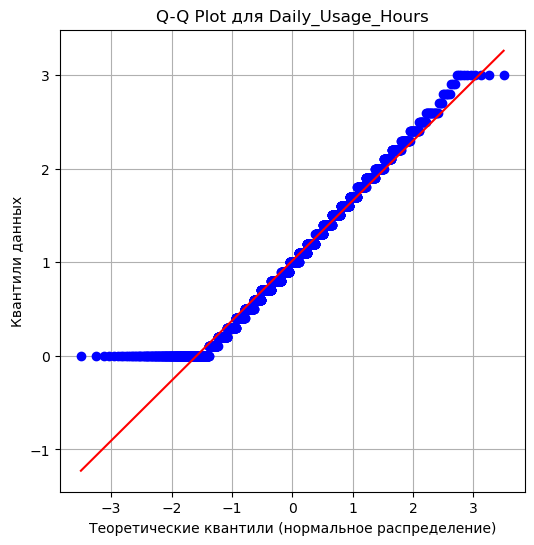

In [95]:
mean = mean_val
std = np.sqrt(variance_val)

bins = 8
hist, bin_edges = np.histogram(data, bins = bins, density=False)
observed = hist

expected = []
for i in range(len(bin_edges) - 1):
    left = bin_edges[i]
    right = bin_edges[i + 1]
    prob = stats.norm.cdf(right, mean, std) - stats.norm.cdf(left, mean, std)
    expected.append(prob * n)

expected = np.array(expected)

chi_square_stat = np.sum((observed - expected) ** 2 / expected)
df_chi = len(observed) - 1 - 2 #Степени свободы
critical_value = stats.chi2.ppf(1 - 0.05, df_chi) #критическое значение

print("Критерий хи-квадрат:")
print(f"Статистика хи-квадрат: {chi_square_stat:.2f}")
print(f"Критическое значение (alpha=0.05, df={df_chi}): {critical_value:.2f}")
if chi_square_stat > critical_value:
    print("Отвергаем гипотезу о нормальности (данные не нормальны)")
else:
    print("Не отвергаем гипотезу о нормальности")

from scipy.stats import probplot

plt.figure(figsize=(6, 6)) 
probplot(data, dist='norm', plot=plt) #график функции распределения
plt.title('Q-Q Plot для Daily_Usage_Hours')
plt.xlabel('Теоретические квантили (нормальное распределение)')
plt.ylabel('Квантили данных')
plt.grid(True)
plt.show()

Исходные данные: 3000 наблюдений

ОЦЕНКА ЭФФЕКТИВНОСТИ ПРЕОБРАЗОВАНИЙ:

Без выбросов (IQR):
  Асимметрия: 0.340, Эксцесс: -0.400
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000

Логарифмирование log(x+1):
  Асимметрия: -0.319, Эксцесс: -0.652
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000

Степенное (x^0.8):
  Асимметрия: -0.015, Эксцесс: -0.548
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000

Стандартизация (Z-score):
  Асимметрия: 0.340, Эксцесс: -0.400
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000

Нормировка (Min-Max):
  Асимметрия: 0.340, Эксцесс: -0.400
  Shapiro-Wilk p-value: 0.000000
  Хи-квадрат p-value: 0.000000
  Наблюдений: 3000


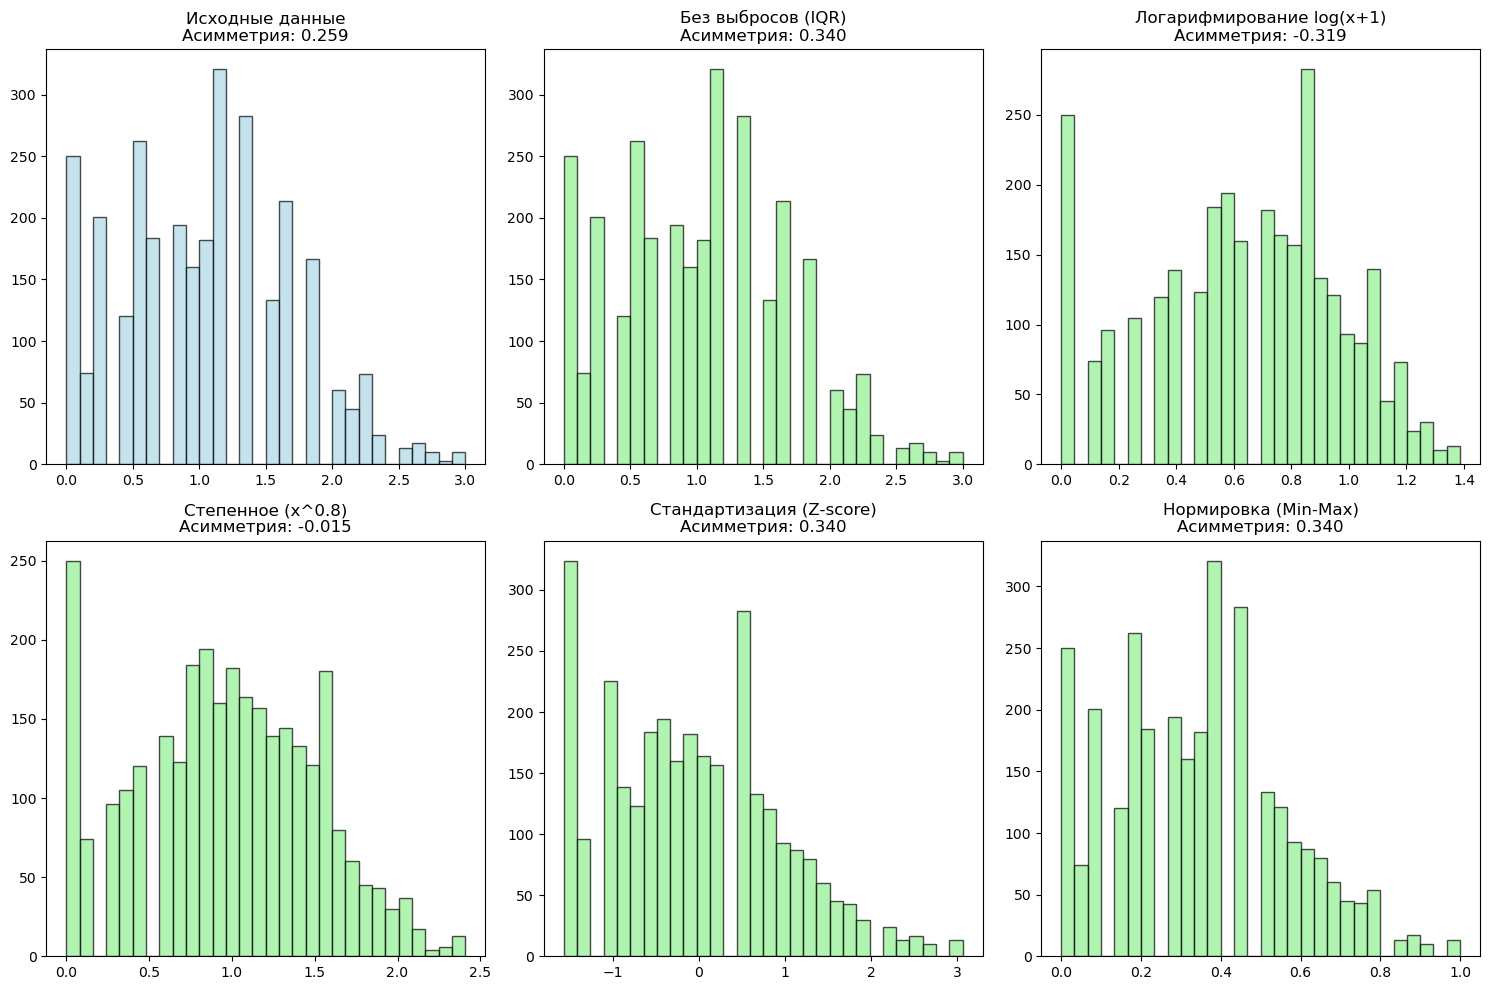


НАИЛУЧШЕЕ ПРЕОБРАЗОВАНИЕ: Степенное (x^0.8)
• Асимметрия: -0.015
• Эксцесс: -0.548
• Shapiro-Wilk p-value: 0.000000
• Хи-квадрат p-value: 0.000000
Вывод: Существенное отклонение от нормальности


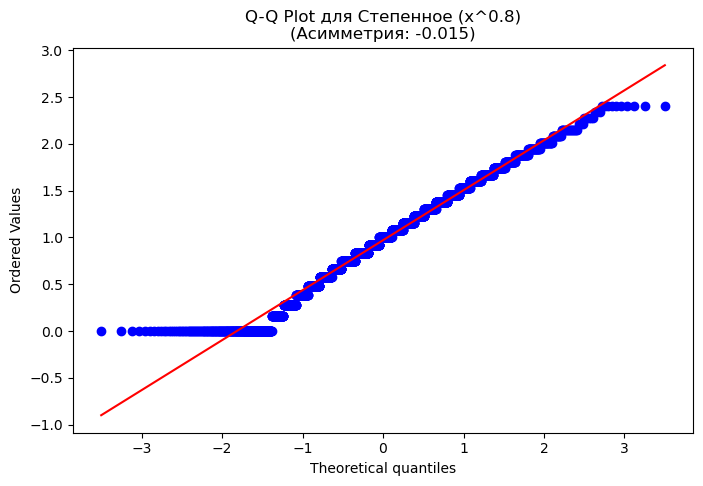

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from math import sqrt, erf, pi

# === ФУНКЦИИ ===

# Функция распределения нормального закона (для χ²)
def normal_cdf(x, mu, sigma):
    z = (x - mu) / sigma
    return 0.5 * (1 + erf(z / sqrt(2)))

# χ²-тест для проверки нормальности
def chi_square_normality_test(data, bins=10):
    n = len(data)
    mu, sigma = np.mean(data), np.std(data, ddof=0)

    # равновероятные интервалы
    probabilities = np.linspace(0, 1, bins + 1)
    boundaries = [stats.norm.ppf(p, loc=mu, scale=sigma) for p in probabilities]

    # наблюдаемые частоты
    observed, _ = np.histogram(data, bins=boundaries)

    # ожидаемые частоты
    expected = []
    for i in range(len(boundaries) - 1):
        p_lower = normal_cdf(boundaries[i], mu, sigma)
        p_upper = normal_cdf(boundaries[i+1], mu, sigma)
        expected.append(n * (p_upper - p_lower))

    # χ²-статистика
    chi2_stat = sum((obs - exp_val) ** 2 / exp_val
                    for obs, exp_val in zip(observed, expected) if exp_val > 0)

    df = bins - 3  # bins - 1 - 2 параметра
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)

    return chi2_stat, df, p_value


# Загружаем данные
print(f"Исходные данные: {len(data)} наблюдений")
data=np.array(data)
# 1. 
transformations = {}

# a) Удаление выбросов (IQR метод)
q1, q3 = np.quantile(data, 0.25), np.quantile(data, 0.75)
iqr = q3 - q1
lower_bound, upper_bound = q1 - 1.5*iqr, q3 + 1.5*iqr
data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
transformations['Без выбросов (IQR)'] = data_no_outliers

# b) Логарифмирование
transformations['Логарифмирование log(x+1)'] = np.log1p(data)

# c) Степенное преобразование
transformations['Степенное (x^0.8)'] = data ** 0.8

# d) Стандартизация (Z-score)
transformations['Стандартизация (Z-score)'] = (data - np.mean(data)) / np.std(data)

# e) Нормировка (Min-Max)
transformations['Нормировка (Min-Max)'] = (data - np.min(data)) / (np.max(data) - np.min(data))

# 2. эффективность
results = []
print("\nОЦЕНКА ЭФФЕКТИВНОСТИ ПРЕОБРАЗОВАНИЙ:")
print("=" * 60)

for name, transformed_data in transformations.items():
    skewness = stats.skew(transformed_data)
    kurtosis = stats.kurtosis(transformed_data)
    shapiro_stat, shapiro_p = stats.shapiro(transformed_data)
    chi2_stat, df, chi2_p = chi_square_normality_test(transformed_data)

    results.append({
        'name': name,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'shapiro_p': shapiro_p,
        'chi2_p': chi2_p,
        'n': len(transformed_data)
    })

    print(f"\n{name}:")
    print(f"  Асимметрия: {skewness:.3f}, Эксцесс: {kurtosis:.3f}")
    print(f"  Shapiro-Wilk p-value: {shapiro_p:.6f}")
    print(f"  Хи-квадрат p-value: {chi2_p:.6f}")
    print(f"  Наблюдений: {len(transformed_data)}")

# 3. Гистограммы
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

axes[0].hist(data, bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0].set_title('Исходные данные\nАсимметрия: 0.259')

for i, (name, transformed_data) in enumerate(transformations.items(), 1):
    if i >= len(axes):
        break
    result = next(r for r in results if r['name'] == name)
    axes[i].hist(transformed_data, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[i].set_title(f'{name}\nАсимметрия: {result["skewness"]:.3f}')

plt.tight_layout()
plt.show()

best_transform = max(results, key=lambda x: (x['shapiro_p'], -abs(x['skewness'])))

print(f"\n{'='*60}")
print(f"НАИЛУЧШЕЕ ПРЕОБРАЗОВАНИЕ: {best_transform['name']}")
print(f"{'='*60}")
print(f"• Асимметрия: {best_transform['skewness']:.3f}")
print(f"• Эксцесс: {best_transform['kurtosis']:.3f}")
print(f"• Shapiro-Wilk p-value: {best_transform['shapiro_p']:.6f}")
print(f"• Хи-квадрат p-value: {best_transform['chi2_p']:.6f}")
print("Вывод:", "Распределение близко к нормальному"
      if best_transform['shapiro_p'] > 0.05 and best_transform['chi2_p'] > 0.05
      else "Существенное отклонение от нормальности")

# 5. Q-Q PLOT
best_data = transformations[best_transform['name']]
plt.figure(figsize=(8, 5))
stats.probplot(best_data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot для {best_transform["name"]}\n(Асимметрия: {best_transform["skewness"]:.3f})')
plt.show()

Среднее и дисперсия по группам:
                  mean       var
School_Grade                    
10th          1.028542  0.448710
11th          0.991649  0.409888
12th          1.024008  0.400313
7th           1.021328  0.418375
8th           0.975311  0.423859
9th           1.052662  0.422764


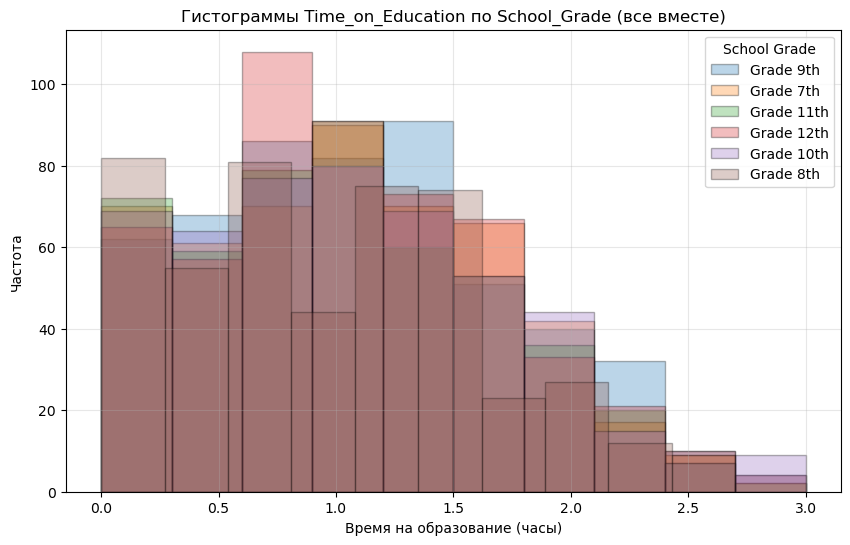

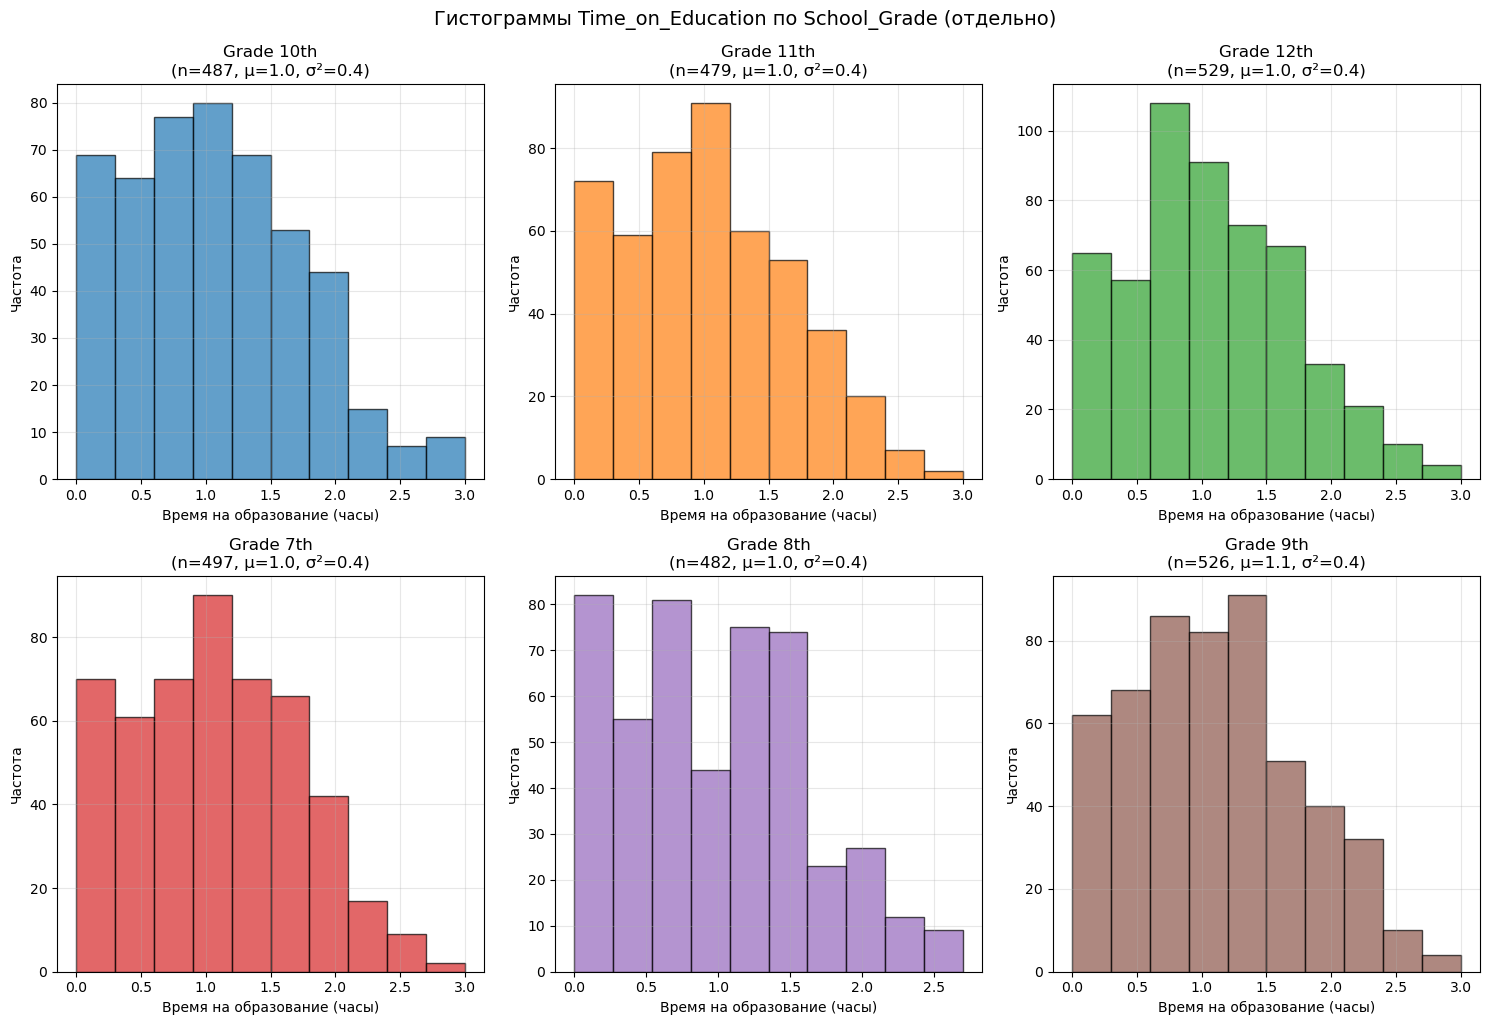


Дополнительная статистика:
Общее количество наблюдений: 3000
Общее среднее: 1.02
Общая дисперсия: 0.42


In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные
file_path = 'C:/Users/User/Downloads/teen_phone_addiction_dataset.csv'
df = pd.read_csv(file_path)

# Столбец для анализа
col_to_analyze = 'Time_on_Education'

# === Группировка по School_Grade ===
grouped = df.groupby('School_Grade')[col_to_analyze]

# Среднее и дисперсия по группам
stats_by_grade = grouped.agg(['mean', 'var'])
print("Среднее и дисперсия по группам:")
print(stats_by_grade)

# Все гистограммы на одном графике
plt.figure(figsize=(10, 6))
grades = df['School_Grade'].unique()

for grade in grades:
    subset = df[df['School_Grade'] == grade][col_to_analyze].dropna()
    plt.hist(subset, bins=10, alpha=0.3, label=f'Grade {grade}',edgecolor='black')

plt.title("Гистограммы Time_on_Education по School_Grade (все вместе)")
plt.xlabel("Время на образование (часы)")
plt.ylabel("Частота")
plt.legend(title="School Grade")
plt.grid(alpha=0.3)
plt.show()

# Отдельные гистограммы для каждой группы
grades = sorted(df['School_Grade'].unique())
n_grades = len(grades)

# Создаем сетку подграфиков
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) 
axes = axes.flatten() 

for i, grade in enumerate(grades):
    if i < len(axes):  # Защита от выхода за границы
        subset = df[df['School_Grade'] == grade][col_to_analyze].dropna()
        
        axes[i].hist(subset, bins=10, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[i].set_title(f'Grade {grade}\n(n={len(subset)}, μ={subset.mean():.1f}, σ²={subset.var():.1f})')
        axes[i].set_xlabel("Время на образование (часы)")
        axes[i].set_ylabel("Частота")
        axes[i].grid(alpha=0.3)

# Убираем лишние подграфики, если их больше чем групп
for i in range(len(grades), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle("Гистограммы Time_on_Education по School_Grade (отдельно)", y=1.02, fontsize=14)
plt.show()

# === Дополнительная статистика ===
print(f"\nДополнительная статистика:")
print(f"Общее количество наблюдений: {len(df[col_to_analyze].dropna())}")
print(f"Общее среднее: {df[col_to_analyze].mean():.2f}")
print(f"Общая дисперсия: {df[col_to_analyze].var():.2f}")